# Backend Code

In [1]:
import pandas as pd
import geopandas as gpd
from IPython.display import HTML, Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
combined_df = pd.read_csv(r'../data/combined_df.csv')
us_county_gdf = gpd.read_file('../data/us_counties_albers.geojson')
election_data_df=pd.read_csv("../data/2020_election.csv")

In [3]:
election_data_df["outcome"]=election_data_df["per_point_diff"]<0
dem_maj_map={False: "Rep", True: "Dem"}
election_data_df["outcome"]=election_data_df["outcome"].map(dem_maj_map)
election_data_df["per_point_diff"]=np.abs(election_data_df["per_point_diff"])
election_data_df['fips']=election_data_df['county_fips'].astype(str).str.pad(5,fillchar='0')
election_data_gdf = pd.merge(us_county_gdf,
                             election_data_df,
                             left_on=['fips'],
                             right_on=['fips'])
part_filter = combined_df['per_point_diff'] > 0.5 
partisan_df = combined_df[part_filter]

In [4]:
combined_df['per_point_diff_outcome']=np.where(combined_df['outcome']=='Rep',1,-1)*combined_df['per_point_diff']

# Understanding the ‘Healthcare Paradox’: Why do people who would benefit from state provided health insurance oppose Obamacare?

## What is the Healthcare Paradox and What Does it Have to do with Politics?

Every four years, when election time comes around, healthcare is consistently an emotive flashpoint. Indeed, given the Pew Research Center’s finding that 68% of registered voters say that healthcare is ‘very important’ issue when deciding who to vote for (second only to the economy in importance), it doesn’t seem to be an overstatement to say that a popular health care policy can swing an election.  In the previous two elections, the Affordable Care Act – often called Obamacare after its progenitor– has been the key issue up for debate. Perhaps because of its Democratic origins, the ACA has become an incredibly partisan issue, despite the seemingly beneficial goal of expanding state provided healthcare insurance to the uninsured. Indeed, the extent to which voters are divided on party lines with regards to healthcare is quite staggering – 86% of Democrat voters are in favor of the legislation compared to just 20% of Republican voters.  The argument for the ACA seems simple enough – presumably, in an ideal world, anyone would hope that healthcare coverage was enjoyed by all. The argument against, however, is a little less clear. Why do so many Republicans hate the ACA?

The answer you get to this question is, more often than not, just as partisan as opinions towards the ACA itself. A Republican legislator would say that the opposition is a result of the ACA not making economic sense. They fear that the state interfering in healthcare will only push up premiums for people who can afford healthcare themselves and that this distortion could lead to economic failure and the collapse of the entire health insurance system. It is this fear that has seen Republican politicians describe that ACA as “the most dangerous piece of legislation ever passed” and as being “as destructive to personal and individual liberties as the Fugitive Slave Act.”  A Democrat in Washington would likely view these tirades as mere dog-whistles which scare voters away from state involvement in healthcare for the profits of private interests and at the cost of American health. From our perspective, the economic impacts of Obamacare seem extremely uncertain and it’s very difficult for a no-economists like us to get an unbiased opinion on this topic. The first two Google results for the search ‘Economic Impacts of Obamacare’ illustrate this point nicely – the first result, published by the conservative think tank the Manhattan Institute, condemns the act and forecasts that it lost the economy over $1 trillion during the 2010s alone,  while the second result, published by the Obama White House, cheerfully lays out the multi-faceted ways in which Obamacare is “laying the foundation for future economic growth.” 

From this quick internet research alone, we can see how difficult it is to get unbiased information on the macroeconomic impacts of the act. Consequently, it seems hard to believe that economics alone accounts for the Republican electorate’s opprobrium of the act. It is also difficult (and unsettling) to believe that so much of the population has been deceived by private interests when they would benefit from an expansion of government provided healthcare themselves. We believe and hope that there must be an alternative explanation: an explanation based not on deception or complex economic forecasting, but on lived realities. To make our investigation as unbiased as possible (of course, true objectivity is impossible!), we will rely not on rhetoric or empirical observations, but on cold, hard data drawn from across the nation. The riddle that we hope to solve, which we have dubbed ‘The Healthcare Paradox’, is as follows:

Millions of Americans who stand to gain from an expansion of government provided health insurance and protections actively oppose policies that would expand such provisions

In an effort to understand this paradox, we turned to data collected by County Health Rankings. This organization, as the name suggests, collects data pertaining to health on the county level. This means that, hypothetically, we are able to compare any two individual counties in the country against each other on a huge range of health variables, for example life expectancy, child mortality rates or even the number of physicians per 1000 people in the county! In addition to health data, County Health Rankings also collects socio-economic data, for example median income for the county, unemployment, and – crucially – the percentage of people in a given county who are uninsured. Of course, given we are interested in how health policy affects Americans at the ballot box, we needed to combine this data with information on how every county in the US voted but, once we had combined these two data sources, we had the ability to compare health and socio-economic factors against voting outcome in a very precise way. Although presidential candidates compete to win states not counties during elections (meaning that, for example, one Democrat county in an otherwise Republican state will not have any impact on the election) by examining health and insurance on a county level we can derive far more precise insights than if we worked with only states.  
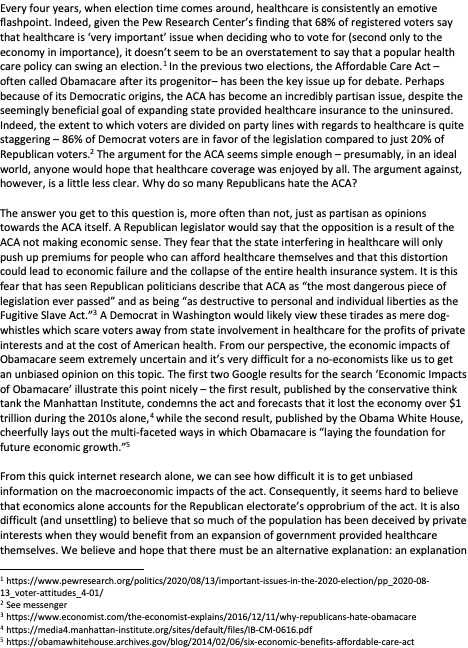

## Does the Healthcare Paradox Really Exist?

A logical starting point for our investigation is to establish that the paradox really exists. For example, Republican voters may oppose the ACA because they all already have health insurance or because they are all extremely healthy and cannot imagine needing health insurance at all. It is also possible that they would support the ACA but choose not to because they do not have access to healthcare in the first place so insurance would be pointless. In the following paragraphs, we will explore all of these eventualities to see if there is an easy and obvious explanation to the paradox: it doesn’t exist.

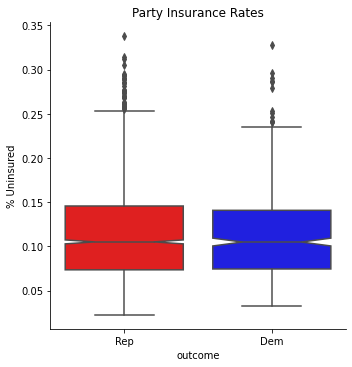

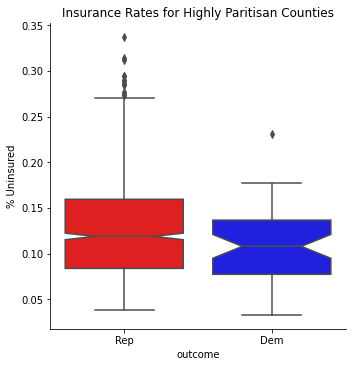

In [5]:
sns.catplot(x='outcome', y='% Uninsured', 
            data=combined_df, kind='box', notch=True,
            palette=['r','b'])
plt.title("Party Insurance Rates")
plt.show()

sns.catplot(x='outcome', y='% Uninsured', 
            data=partisan_df, kind='box', notch=True,
            palette=['r','b'])
plt.title("Insurance Rates for Highly Paritisan Counties")
plt.show()

<sub> Top graph created by JJ, bottom graph created by Daniel </sub>

The graphs above, which show levels of insurance split by party, are bad news if you were hoping for this article to end quickly. They not only show that many Republicans are uninsured, they do more: the bottom graph shows that counties where Trump won by more that 50 percentage points in the 2020 election actually have lower levels of insurance than their staunchly pro-Biden counterparts. On top of this, these counties also have a noticeably lower level of insurance than the average for a Republican county. What’s more, the graphs below, which plot levels of self-reported poor health, repeat the same results:

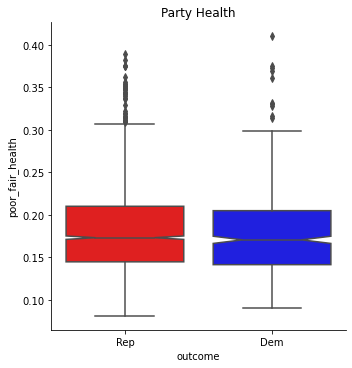

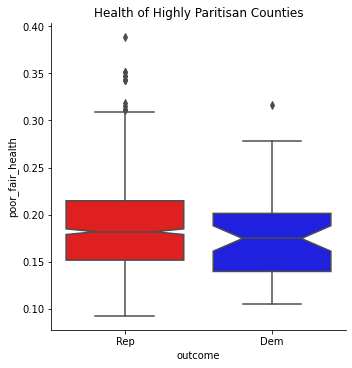

In [6]:
sns.catplot(x='outcome', y='poor_fair_health', 
            data=combined_df, kind='box', notch=True,
            palette=['r','b'])
plt.title("Party Health")
plt.show()

sns.catplot(x='outcome', y='poor_fair_health', 
            data=partisan_df, kind='box', notch=True,
            palette=['r','b'])
plt.title("Health of Highly Paritisan Counties")
plt.show()

<sub>Top graph created by Kaitlyn, bottom graph created by Daniel </sub>

This is puzzling to say the least. Not only do Republicans experience similar levels of poor health and ‘uninsurance’ (for lack of a better word!) to Democrats, but there also appears to be a correlation between a county being extremely Republican and suffering from both poor health and uninsurance.

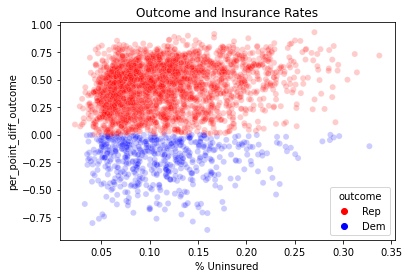

In [7]:
sns.scatterplot(x='% Uninsured', y='per_point_diff_outcome', hue='outcome',
                palette=['r', 'b'], alpha=0.2,
                data=combined_df)
plt.title("Outcome and Insurance Rates")
plt.show()

<sub> Plot created by JJ </sub>

Returning briefly to examining only health insurance, the graph above only makes the paradox clearer. This graph plots level of insurance on the x-axis against how the county voted on the y-axis. Instead of treating voting outcome as a binary variable, however, we made it continuous so that we can observe not only whether or not a county voted Democrat or Republican, but also to what extent they voted the way they did. This is useful because, if a county has only a handful more votes for one party than the other, it is not very helpful for our analysis as it will not allow us to unpick differences in health and socioeconomic outcomes between Democrats and Republicans as individuals; it is in the instances when a county votes Republican or Democrat by a landslide that we can learn the most about Republican or Democrat voters as individuals.

What we can learn from this plot is that, although average levels of health insurance are fairly similar for Republicans and Democrats, the vast majority of highly uninsured counties are Republican. Indeed, a staggering 201 out of the 217 counties with over 20% of the population uninsured vote for the party which opposes state intervention to ensure adequate provision of healthcare.

It is tempting, at this point, to conclude that one of the two traditional explanations for the Healthcare Paradox must be applicable to the electorate of these Republican strongholds: they are either exceptional economists, or they have been misled. 

We were not to be deterred, however. Perhaps, we asked ourselves, these Republican voters are merely responding rationally to practical conditions on the ground: even if they were insured, there are no health care providers near them; therefore, they are not interested in healthcare policy and they instead focus on other issues when deciding how to cast their vote. In the case of these highly uninsured counties, this line of reasoning did – at last! – bear some fruit. As the bar charts below show, Republican counties with low levels of insurance do have access to significantly fewer physicians than the average across the rest of the country. This was not true, however, for Republican counties on average so serves only as a partial explanation to the paradox for certain outliers. It is also very important to remember that correlation does not equate to causation – perhaps the lack of doctors in the area is a response to the population being unable/unwilling to make use of healthcare rather than the other way around!

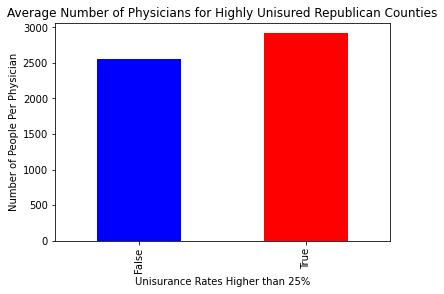

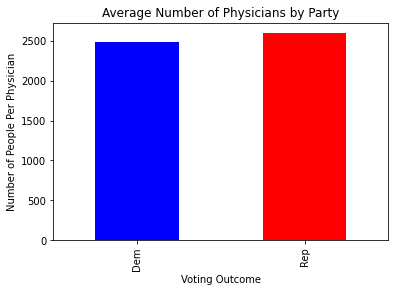

In [8]:
reps_filter=(combined_df["per_point_diff_outcome"] > 0)
unins_filter=(combined_df["% Uninsured"] > 0.25)
combined_df["is_rep_unins"]=reps_filter & unins_filter
rep_unions = combined_df.groupby('is_rep_unins')['ratio_population_to_physicians'].mean()
barlist = rep_unions.plot(kind = 'bar', color = ['b', 'r'])
plt.xlabel("Unisurance Rates Higher than 25%")
plt.ylabel("Number of People Per Physician")
plt.title("Average Number of Physicians for Highly Unisured Republican Counties")
plt.show()

grouped_by_ratio_df = combined_df.groupby('outcome')['ratio_population_to_physicians'].mean()
barlist = grouped_by_ratio_df.plot(kind = 'bar', color = ['b', 'r'])
plt.xlabel("Voting Outcome")
plt.ylabel("Number of People Per Physician")
plt.title("Average Number of Physicians by Party")
plt.show()

<sub> Plots created by Kaitlyn </sub>

Overall, in this section we have learnt that the Healthcare Paradox does indeed exist. We have also found, concerningly, that the paradox seems to increase in strength if a county has particularly low levels of insurance.

## Can Analysis of Partisan Demographic Differences Explain the Paradox?

Having established the existence of the Healthcare Paradox, we will now turn to potential explanations. In this section, we will take a look at voting habits and demographics across the country. We don’t expect that we will find all the answers here but examining the Democrat and Republican electorates may help to understand their different attitudes towards healthcare reform. The chart below is informative in this sense because, like the scatterplot above, it not only shows us whether a county voted Republican or Democrat, but it also demonstrates the extent to which a county voted either way. This helps us visually differentiate the true Republican and Democrat strongholds from the counties that have roughly even numbers of both Republicans and Democrats.

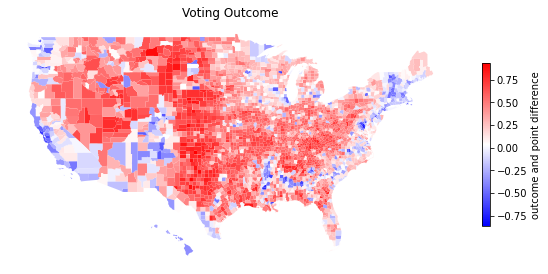

In [9]:
election_data_gdf['per_point_diff_outcome']=election_data_gdf['per_point_diff'] * np.where(election_data_gdf['outcome']=='Dem', -1, 1)

election_data_gdf.plot(column='per_point_diff_outcome',
                       cmap='bwr', legend=True,
                       figsize=(10,10),
                       legend_kwds={'shrink': 0.3,
                                    'label': 'outcome and point difference'}
                      )
plt.axis('off')
plt.title("Voting Outcome")
plt.show()

<sub> Map created by JJ </sub>

The chart shows us many things about the voting environment in the US. Firstly, from just an initial glance one can see that there is far more red (the color of the Republican party) on the map than there is blue (the Democrat’s color). This is not only because there are many more Republican counties than Democrat counties - to be specific, there are 2574 Republican counties and only 537 Democrat counties - but also because, on average, Republican counties are more staunchly Republican than Democrat counties are staunchly Democrat. Impressively, when a county voted Republican, the Republican party won the vote by 43.1 percentage points on average. This blows away the average Democrat victory of a comparatively puny 23.1 percentage points! There are a few important takeaways from this observation. Firstly, it shows us the extent to which America is a polarized country. Even an average victory margin of 23.1% is not a close race, yet alone 43.1%. This is only compounded by the fact that, in general, counties border other counties that voted the same way as them – as the map shows, most of America’s coastline is blue while Republicans dominate the interior. Secondly, and perhaps more important for understanding the Healthcare Paradox, we can infer from the huge average percentage point victory for Republican counties, that these counties are usually not politically diverse. This may mean that individuals within these counties are not exposed to many arguments for supporting the ACA and inadvertently vote against their own interests due to healthcare as a result of lack of/mis- information.

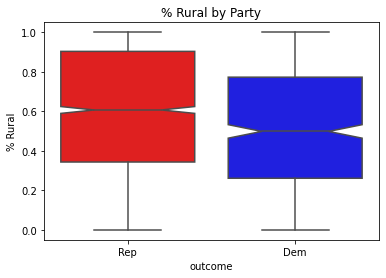

In [10]:
sns.boxplot(x='outcome', y='% Rural', 
            data=combined_df, notch=True,
            palette=['r','b'])
plt.title("% Rural by Party")
plt.show()

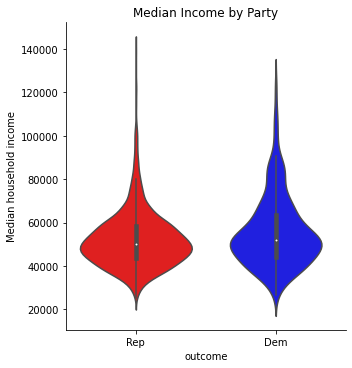

In [11]:
sns.catplot(x='outcome', y='Median household income', 
            data=combined_df, kind='violin', notch=True,
            palette=['r','b'])
plt.title("Median Income by Party")
plt.show()

<sub> Plots created by Daniel </sub>

The graphs shown above, as well as helping us to understand the key differences between red and blue counties, lend further support to the hypothesis that Republican voters may be voting against their own interests due to a lack of diverse or dissident opinions within their communities. The top graph is a boxplot which shows that Republican counties are significantly more rural than Democrat counties, with a median rural percentage of 64.5% in red counties and only 19.3% in blue counties. This has several important consequences. Firstly, it reinforces the idea that some people in Republican counties may lack a variety of different information sources on the ACA and other healthcare issues (working on the assumption that it is harder to source a wide range of media in rural areas), thus making it difficult to form an independent and informed decision. Secondly, people in rural counties may have lower day to day exposure to people of different socio-economic status; this could make them less empathetic towards people who lack access to healthcare or, alternatively, less aware that they are in a minority of people who do not have healthcare insurance. These factors in turn could mean that rural dwellers with health insurance are less likely to support the expansion of state provided insurance because they do not see a need for it in their community and that rural dwellers without health insurance are unaware that others have it.

The takeaways from the bottom-hand graph are less clear, but nevertheless help us to understand the key differences between Republican and Democrat counties. This graph is a violin plot that shows the distribution of median household income in US counties, divided according to how the county voted. First of all, we can see from the plot that the median household income in Democrat counties is slightly higher but that the difference is not very large – for the purpose of this investigation, they are essentially the same. What is noticeable, however, is that Republican counties are more closely clustered around the median income, whereas Democrat counties are more varied in their income. This visual insight is borne out by the math as well – the standard deviation in household income among Democrat counties is 27% higher than it is in Republican counties. Puzzlingly, this difference on an inter-county level is not clearly borne out on an intra-county level, as inequality levels within Republican and Democrat counties are comparable – Democrat counties have an average income inequality of 4.59 compared to a Republican average of 4.51 (County Health Rankings measures inequality as the ratio in earnings between the 20th percentile and 80th percentile households in a county). On the other hand, however, when observing only highly partisan counties – any county which had a victory margin of over 50 percentage points – the size of this difference in inequality doubles. All combined, we can learn from this analysis that Democrat counties are slightly more income diverse than Republican counties, both within and between counties. However, this difference is only very slight. It is worth bearing this slight difference in mind moving forwards, because it supports the findings from our rural and partisan analysis that Republican counties are typically less diverse and more isolated for a variety of measures, but analysis of comparative income and income inequality alone does not bring us much closer to understanding the healthcare paradox. 

As expected, from this high-level analysis of the two parties’ electorates, we have found plenty of interesting clues, but no smoking gun. From looking at percentage point victory margins, urban/rural demographics, and average incomes across the two parties, we have built up an impression of the Democrat electorate as urban, based near the coasts, and less politically isolated. On the other hand, we have seen that the Republican electorate is mostly rural, based in central America, more politically isolated in staunchly Republican counties/states, and slightly less diverse with regards to income than the Democrats. Overall, this lends some support for an explanation of the paradox rooted in Republican voters being misinformed or actively misled to oppose the ACA because they are relatively isolated in politically homogenous, rural communities which makes them more susceptible to manipulation than if they lived somewhere more diverse and densely populated.

## Does Insurance Actually Help Health Outcomes?

Ever optimistic, we decided to test one final hypothesis. Was it possible, we asked ourselves, that Republicans’ health is less impacted by insurance than Democrats’ health is? On the face of it, this hypothesis for explaining the Healthcare Paradox seemed like a longshot. In a country of over 300 million people, could there really be significant differences in how having health insurance impacted health between the electorates of the two largest parties? Although we are still struggling to say why, it turns out that there are…

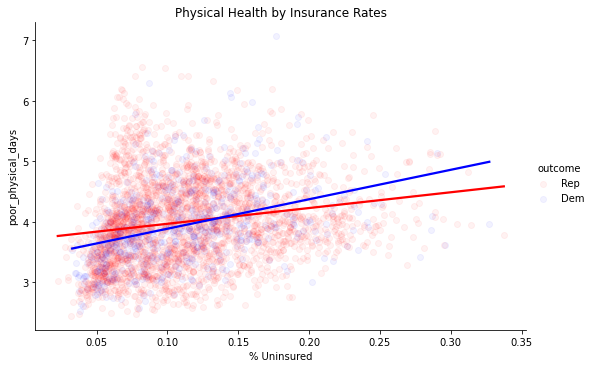

In [18]:
Physical_Plot = sns.lmplot(x = '% Uninsured',
                                   y = 'poor_physical_days',
                                   data=combined_df, 
                                   hue='outcome', 
                                   height=5, 
                                   aspect=1.5, 
                                   palette=['red', 'blue'], 
                                   scatter_kws = {'alpha': 0.05},
                                  ci=0)
plt.title("Physical Health by Insurance Rates")
plt.show()

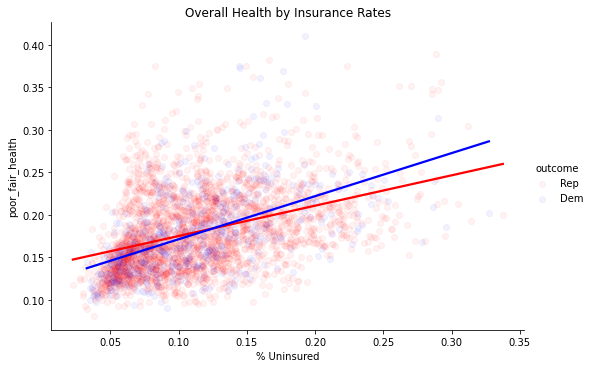

In [19]:
Health_Plot = sns.lmplot(x = '% Uninsured',
                                   y = 'poor_fair_health',
                                   data=combined_df, 
                                   hue='outcome', 
                                   height=5, 
                                   aspect=1.5, 
                                   palette=['red', 'blue'], 
                                   scatter_kws = {'alpha': 0.05},
                                  ci=0)
plt.title("Overall Health by Insurance Rates")
plt.show()

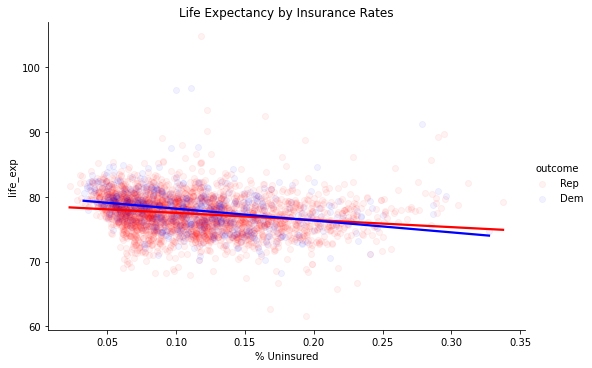

In [20]:
Life_Plot = sns.lmplot(x = '% Uninsured',
                                   y = 'life_exp',
                                   data=combined_df, 
                                   hue='outcome', 
                                   height=5, 
                                   aspect=1.5, 
                                   palette=['red', 'blue'], 
                                   scatter_kws = {'alpha': 0.05},
                                  ci=0)
plt.title("Life Expectancy by Insurance Rates")
plt.show()

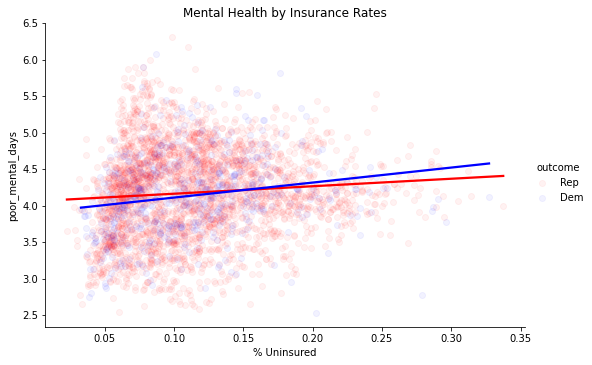

In [21]:
Mental_Plot = sns.lmplot(x = '% Uninsured',
                                   y = 'poor_mental_days',
                                   data=combined_df, 
                                   hue='outcome', 
                                   height=5, 
                                   aspect=1.5, 
                                   palette=['red', 'blue'], 
                                   scatter_kws = {'alpha': 0.05},
                                  ci=0)
plt.title("Mental Health by Insurance Rates")
plt.show()

<sub> Plots created by Kaitlyn </sub>

The graphs above all plot the percentage of people in a county who are uninsured against health outcomes. Each graph is a scatterplot of all counties in the US with lines of best fit drawn on top to make it easy to discern general trends. From top left to top right, the health outcomes are poor health, the percentage of people in a county who self-reported being of poor health; poor physical days, the average number of self-reported days that people in a county reported being in poor physical health; poor mental days, the average number of self-reported days that people in a county reported being in poor mental health; and life expectancy. Across all four health outcomes, we can see that counties that voted Democrat were more sensitive to a change in insurance with regards to health outcomes. The effect is not incredibly strong, however any trend repeated four times over for such a large amount of data is still impressive and worth considering. For example, a difference of only 0.1 poor physical days per month across the population of the US would result in approximately 400 million extra days per year that Americans spend feeling in poor physical health. When the numbers are scaled up like this, the very real human impact of these graphs becomes far clearer.

It is important to note, however, that this data is not infallible. For example, three of the four graphs measure a health outcome that is self-reported. Perhaps the rugged individualism that is at the heart of Republican ideology causes the population of Republican counties to systematically understate the extent to which they are unwell? Alternatively, perhaps some urban Democrats who feel an entitled to health care but do not have it will overstate their ill health? It is noticeable that the graph which shows by far the weakest effect is life expectancy which is not self-reported. Another consideration when assessing this data is that, because Democrat counties are more diverse, they may overrepresent the extremes in the graph: the highly insured, very healthy counties, and the poorly insured, very unhealthy counties. This diversity may be the reason for the observed increased sensitivity and, if a county were to change its level of insurance by a given amount, it is unlikely that the health outcomes would shift exactly according to the line of best fit on the graphs above.

Slight fallibilities aside, the takeaways from these graphs are still extremely interesting and provide what is probably the most satisfactory answer to the Healthcare Paradox that we have come across yet: Republicans are less concerned about healthcare as a voting issue because their health is less susceptible to changes in insurance than Democrat health is. Despite our best efforts, we have not been able to find any definitive reasons for this discrepancy in the data. Perhaps the best possible explanation is the higher levels of income inequality among Democrat counties. This increased inequality means that, even though the median household income between red and blue counties is very similar, changes to levels of insurance may impact very low-income households more prevalent in urban, Democrat counties than in rural Republican counties.

## And to Conclude…. It’s Confusing

Although we have learnt a lot from this examination, perhaps clearest takeaway from our investigation is that the Healthcare Paradox is complicated. Furthermore, it is very important to bear in mind that healthcare is not the only issue that determines how an individual will vote (even though, as we established in the introduction, it is one of the most important factors). Furthermore, as we discussed in the introduction, during this project we have attempted to reject a simple explanation for the paradox: that voters are being misled into voting against their interests. Unfortunately, unless Republican voters are consistently far more accomplished economic forecasters than Democrat voters, it seems like this is the case to some extent. Although we have found some explanations for the partisan divergence in opinions about the ACA in the data, we have not found evidence sufficiently compelling to reject the hypothesis that voters are being misled. With this borne in mind, we will conclude this investigation by listing some of our key findings:

1)	Given comparable levels of insurance and health in Republican and Democrat counties, there is compelling evidence for the Healthcare Paradox’s existence. It seems clear that some voters are voting against a policy that would directly benefit their health and their financial security

2)	Because of demographic and geographic differences between Republican and Democrat counties, Republican counties appear to be more susceptible to being misinformed because they are typically rural, politically homogenous, and less economically diverse

3)	Counties with particularly low levels of insurance are very likely be vote Republican. This can partially be explained by Key Finding #2 but we found that it may also be partially explained by a lack of healthcare providers in these counties

4)	Although the data must be handled with caution, Democrat counties seem to be more sensitive to changes in insurance than Republican counties when considering health outcomes. Although we do not know definitively why this is the case, it suggests that there may be some basis for Republican counties being less concerned with healthcare and health insurance as a voting issue